In [4]:
import sys
sys.path.append('D:/ERA/ERA_V1/')


import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
from torch_lr_finder import LRFinder
from Dataloader.dataloder_10 import load_dataset
from Model.model_10 import Custom_Resnet,model_summary
from Training.train_10 import Trainer,run

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
trainloader, testloader = load_dataset()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [3]:
model = Custom_Resnet().to(device)
model_summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1, 128,

Leslie Smith's approach


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.91E-01


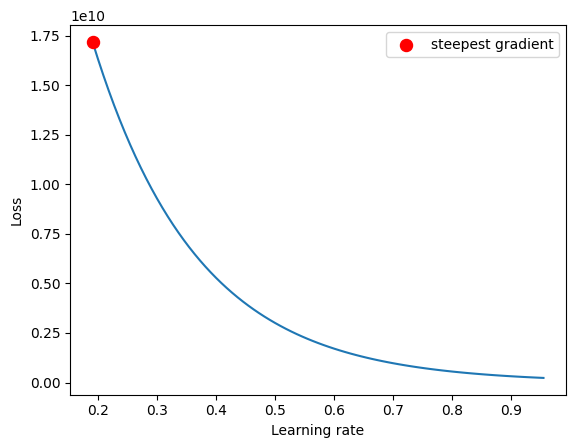

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

Epoch 1/24


Loss=2.2785 Accuracy=15.18: 100%|██████████| 98/98 [00:58<00:00,  1.69it/s] 



Test set: Average loss: 2.3383, Accuracy: 1377/10000 (13.77%)
Epoch 2/24


Loss=1.5968 Accuracy=45.54: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.7017, Accuracy: 3808/10000 (38.08%)
Epoch 3/24


Loss=1.5414 Accuracy=45.83: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]



Test set: Average loss: 1.4768, Accuracy: 4747/10000 (47.47%)
Epoch 4/24


Loss=1.3533 Accuracy=48.21: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.3001, Accuracy: 5543/10000 (55.43%)
Epoch 5/24


Loss=1.2371 Accuracy=55.65: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.3734, Accuracy: 5200/10000 (52.00%)
Epoch 6/24


Loss=1.1758 Accuracy=58.33: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.6492, Accuracy: 5065/10000 (50.65%)
Epoch 7/24


Loss=1.0592 Accuracy=61.61: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.2922, Accuracy: 5664/10000 (56.64%)
Epoch 8/24


Loss=1.0355 Accuracy=64.29: 100%|██████████| 98/98 [00:57<00:00,  1.69it/s]



Test set: Average loss: 1.0104, Accuracy: 6636/10000 (66.36%)
Epoch 9/24


Loss=0.9009 Accuracy=68.15: 100%|██████████| 98/98 [00:58<00:00,  1.69it/s]



Test set: Average loss: 0.8740, Accuracy: 7154/10000 (71.54%)
Epoch 10/24


Loss=1.1111 Accuracy=62.50: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]



Test set: Average loss: 0.7838, Accuracy: 7281/10000 (72.81%)
Epoch 11/24


Loss=0.8266 Accuracy=71.73: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]



Test set: Average loss: 0.6759, Accuracy: 7668/10000 (76.68%)
Epoch 12/24


Loss=0.8390 Accuracy=72.02: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]



Test set: Average loss: 0.7394, Accuracy: 7498/10000 (74.98%)
Epoch 13/24


Loss=0.8479 Accuracy=69.35: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]



Test set: Average loss: 0.7285, Accuracy: 7568/10000 (75.68%)
Epoch 14/24


Loss=0.7801 Accuracy=69.64: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]



Test set: Average loss: 0.6351, Accuracy: 7877/10000 (78.77%)
Epoch 15/24


Loss=0.6926 Accuracy=75.30: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]



Test set: Average loss: 0.5473, Accuracy: 8162/10000 (81.62%)
Epoch 16/24


Loss=0.5891 Accuracy=79.46: 100%|██████████| 98/98 [00:57<00:00,  1.70it/s]



Test set: Average loss: 0.5611, Accuracy: 8138/10000 (81.38%)
Epoch 17/24


Loss=0.5894 Accuracy=79.17: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]



Test set: Average loss: 0.5337, Accuracy: 8187/10000 (81.87%)
Epoch 18/24


Loss=0.6310 Accuracy=76.19: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4944, Accuracy: 8337/10000 (83.37%)
Epoch 19/24


Loss=0.5442 Accuracy=79.46: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4643, Accuracy: 8432/10000 (84.32%)
Epoch 20/24


Loss=0.5205 Accuracy=81.55: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4308, Accuracy: 8530/10000 (85.30%)
Epoch 21/24


Loss=0.5464 Accuracy=83.04: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4257, Accuracy: 8583/10000 (85.83%)
Epoch 22/24


Loss=0.4873 Accuracy=80.06: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s]



Test set: Average loss: 0.4133, Accuracy: 8598/10000 (85.98%)
Epoch 23/24


Loss=0.3825 Accuracy=86.01: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4097, Accuracy: 8619/10000 (86.19%)
Epoch 24/24


Loss=0.4118 Accuracy=85.12: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 0.4066, Accuracy: 8626/10000 (86.26%)


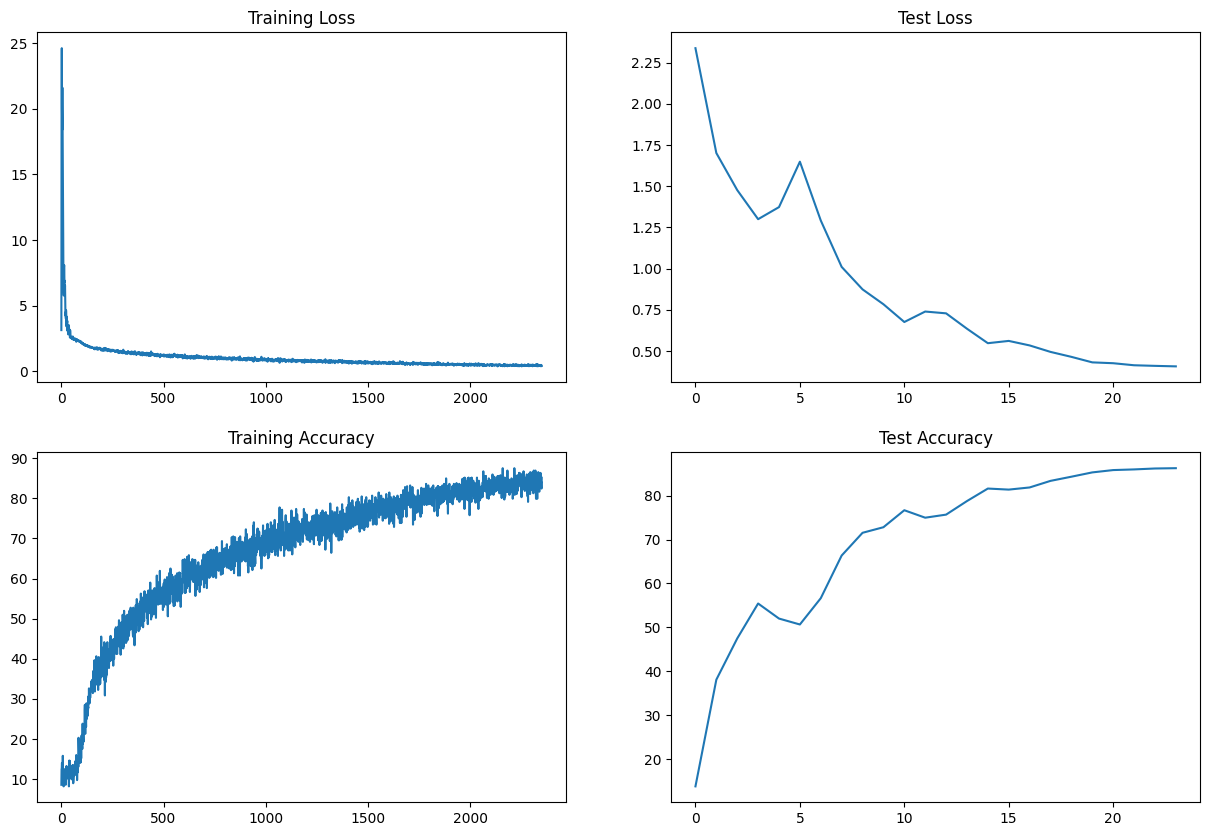

In [9]:
trainer = Trainer(model,device,trainloader,testloader,lr_max=1.80e-01,lr_min=0.019,epochs=24,max_at_epoch=5)
trainer.run()

Tweaked version from fastai

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.31E-01


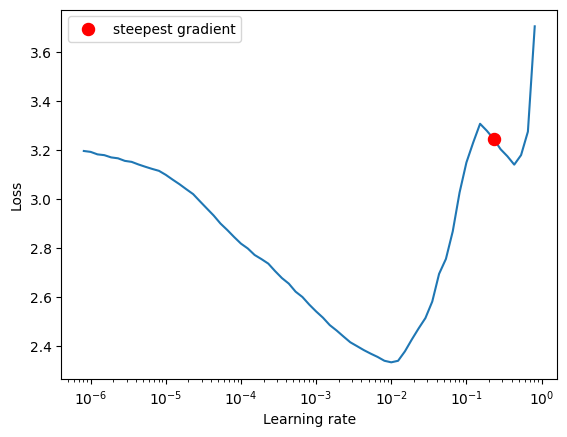

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Epoch 1/24


Loss=0.6084 Accuracy=77.38: 100%|██████████| 98/98 [00:56<00:00,  1.72it/s]



Test set: Average loss: 0.5225, Accuracy: 8242/10000 (82.42%)
Epoch 2/24


Loss=0.9103 Accuracy=71.13: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.7211, Accuracy: 7621/10000 (76.21%)
Epoch 3/24


Loss=1.3190 Accuracy=58.33: 100%|██████████| 98/98 [00:56<00:00,  1.73it/s]



Test set: Average loss: 7.0051, Accuracy: 4631/10000 (46.31%)
Epoch 4/24


Loss=1.2587 Accuracy=57.44: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s]



Test set: Average loss: 1.2647, Accuracy: 6042/10000 (60.42%)
Epoch 5/24


Loss=0.9706 Accuracy=65.48: 100%|██████████| 98/98 [00:58<00:00,  1.69it/s]



Test set: Average loss: 1.3039, Accuracy: 6117/10000 (61.17%)
Epoch 6/24


Loss=1.1813 Accuracy=61.61: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]



Test set: Average loss: 1.0319, Accuracy: 6808/10000 (68.08%)
Epoch 7/24


Loss=1.4572 Accuracy=46.43: 100%|██████████| 98/98 [00:55<00:00,  1.75it/s] 



Test set: Average loss: 29.1947, Accuracy: 2884/10000 (28.84%)
Epoch 8/24


Loss=1.0644 Accuracy=63.69: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.9607, Accuracy: 6539/10000 (65.39%)
Epoch 9/24


Loss=2.0240 Accuracy=41.07: 100%|██████████| 98/98 [00:55<00:00,  1.75it/s]



Test set: Average loss: 3.6764, Accuracy: 3633/10000 (36.33%)
Epoch 10/24


Loss=1.0444 Accuracy=63.39: 100%|██████████| 98/98 [00:55<00:00,  1.75it/s]



Test set: Average loss: 0.8627, Accuracy: 7010/10000 (70.10%)
Epoch 11/24


Loss=0.9147 Accuracy=66.37: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]



Test set: Average loss: 0.9284, Accuracy: 7000/10000 (70.00%)
Epoch 12/24


Loss=0.8756 Accuracy=71.13: 100%|██████████| 98/98 [00:55<00:00,  1.76it/s]



Test set: Average loss: 0.8276, Accuracy: 7188/10000 (71.88%)
Epoch 13/24


Loss=0.9000 Accuracy=69.64: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.7378, Accuracy: 7501/10000 (75.01%)
Epoch 14/24


Loss=0.8032 Accuracy=71.13: 100%|██████████| 98/98 [00:55<00:00,  1.75it/s]



Test set: Average loss: 0.7469, Accuracy: 7463/10000 (74.63%)
Epoch 15/24


Loss=0.6442 Accuracy=75.30: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.6896, Accuracy: 7667/10000 (76.67%)
Epoch 16/24


Loss=0.6978 Accuracy=74.40: 100%|██████████| 98/98 [00:56<00:00,  1.73it/s]



Test set: Average loss: 0.6963, Accuracy: 7642/10000 (76.42%)
Epoch 17/24


Loss=0.8497 Accuracy=69.35: 100%|██████████| 98/98 [00:55<00:00,  1.75it/s]



Test set: Average loss: 0.6014, Accuracy: 7962/10000 (79.62%)
Epoch 18/24


Loss=0.7152 Accuracy=72.32: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.6044, Accuracy: 7966/10000 (79.66%)
Epoch 19/24


Loss=0.6754 Accuracy=76.19: 100%|██████████| 98/98 [00:56<00:00,  1.75it/s]



Test set: Average loss: 0.5768, Accuracy: 8047/10000 (80.47%)
Epoch 20/24


Loss=0.6349 Accuracy=77.98: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]



Test set: Average loss: 0.5556, Accuracy: 8119/10000 (81.19%)
Epoch 21/24


Loss=0.6412 Accuracy=78.27: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]



Test set: Average loss: 0.5511, Accuracy: 8138/10000 (81.38%)
Epoch 22/24


Loss=0.6594 Accuracy=79.17: 100%|██████████| 98/98 [00:58<00:00,  1.69it/s]



Test set: Average loss: 0.5414, Accuracy: 8171/10000 (81.71%)
Epoch 23/24


Loss=0.6452 Accuracy=76.19: 100%|██████████| 98/98 [00:56<00:00,  1.74it/s]



Test set: Average loss: 0.5382, Accuracy: 8165/10000 (81.65%)
Epoch 24/24


Loss=0.6167 Accuracy=78.27: 100%|██████████| 98/98 [00:56<00:00,  1.72it/s]



Test set: Average loss: 0.5365, Accuracy: 8181/10000 (81.81%)


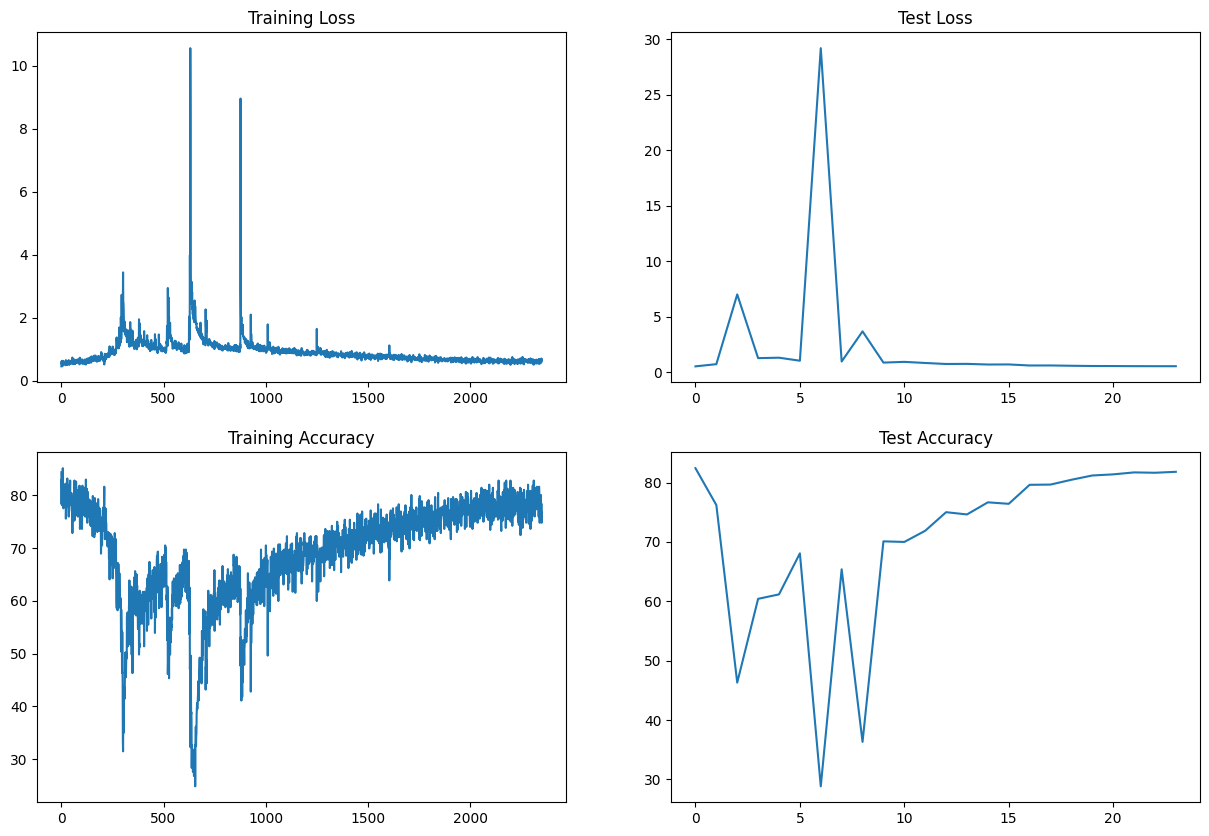

In [10]:
trainer = Trainer(model,device,trainloader,testloader,lr_max=2.31e-01,lr_min=0.0231,epochs=24,max_at_epoch=5)
trainer.run()